In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

from src.cluster_cleaning import *

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
public_df.head()

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,dailyAlertNumber,spendingDay,spendingDayOther,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,otherEmotion,intensity,trigger,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionResponse,emotionDuration,emotionResponseHelpful,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence
0,409266,ccc54e93-ba0c-4b5f-8d7a-b065a12b4289.48809b947...,48822288b1f.b804e245-d906-4ffe-b5d0-0a1b398eebf2,2016-10-16T15:34:28.027Z,1476632068,0,2016-10-16 01:14:22,2016-10-16 01:14:22,4882202063c.0376d98d-8114-4c1d-8da3-40424cfb91bc,2044.0,2.0,other,Planned parenthood,7.0,0.5,moderately,highly,yes,enjoyment,peaceful,NaN,0.50,Returned from exercising at the climbing gym. ...,wellbeing,exercise,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,enjoyment,60,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,409245,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f01ae909.bbab99de-cd4e-4cf3-a9cf-ddc7fdb3e1d4,2016-10-16T15:28:04.277Z,1476631684,1,2016-10-15 01:56:24,2016-10-15 01:56:24,487f0034ecd.ee8ce6d4-b763-47df-b812-53e6b394edf0,7642.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,fear,anxious,NaN,0.25,Workday,workStress,workload,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,action,60+,helpful,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,409247,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f73adefa.f811e180-d1fb-4341-9840-8d2fb39a428b,2016-10-16T15:28:06.452Z,1476631686,2,2016-10-15 05:16:23,2016-10-15 05:16:23,487f72a2f81.5781fea8-2376-4448-9906-c5072b70f11c,1330.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,anger,frustrated,NaN,0.25,"Relationship, work",socialStress,soChallenge,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,withdrawal,30,neutral,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,409313,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,487bdc11f96.c499fc4c-72c6-45e6-bfaa-abbe51984073,2016-10-16T16:03:42.195Z,1476633822,1,2016-10-14 02:28:28,2016-10-14 02:28:28,487bda9559a.9bf80edb-8652-4b87-8be2-0c23ccff0e06,73.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,NaN,0.50,Hanging out with my family and just coming hom...,socialSupport,timeFamily,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,enjoyment,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,409322,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,4881ddddc1d.f3159f84-280b-41a7-bee5-1913b2d6a45e,2016-10-16T16:04:05.588Z,1476633845,6,2016-10-15 23:16:17,2016-10-15 23:16:17,4881dc8e36c.f2d82775-f342-4d53-bec4-dab38817d33e,56.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,yes,enjoyment,happy,NaN,0.50,I actually talked to a faculty member instead ...,wellbeing,play,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,observation,30,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


## Body Sensation Clustering

In [30]:
public_df['workPilingUp'].value_counts()

no            2847
slightly      1556
moderately     988
very           589
completely     259
Name: workPilingUp, dtype: int64

In [10]:
subset_body = create_subset(public_df, bodySens_cols)

In [11]:
subset_body.head()

,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation
0,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
4,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [24]:
train_body, test_body = train_test_split(subset_body, shuffle=True)

In [25]:
subset_body.isna().sum()

bodySensationIntensity        0
bodySensationForehead         0
bodySensationEyes             0
bodySensationJaw              0
bodySensationNeck             0
bodySensationShoulders        0
bodySensationChest            0
bodySensationArms             0
bodySensationHands            0
bodySensationStomach          0
bodySensationBowel            0
bodySensationLegs             0
bodySensationFeet             0
bodySensationLowerBack        0
bodySensationUpperBack        0
bodySensationOther            0
bodySensationOtherLocation    0
dtype: int64

## kMeans Model

In [26]:
kmeans_body = KMeans(n_clusters=6).fit(train_body)
predictions_body = kmeans_body.predict(test_body)
predictions_body

array([3, 0, 3, ..., 0, 3, 0], dtype=int32)

In [27]:
np.unique(predictions_body, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([801,  39,  53, 879,  46,  39]))

## Silhouette Scores

In [28]:
silhouette_score(test_body, predictions_body, metric='euclidean')

0.6302296864091254

In [38]:
X = train_body
range_n_clusters = range(2,10)

# taken from sklearn
def plot_silhouette(df):
    
    for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1) = plt.subplots(1)
        fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels, metric='euclidean')
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4582860010885721


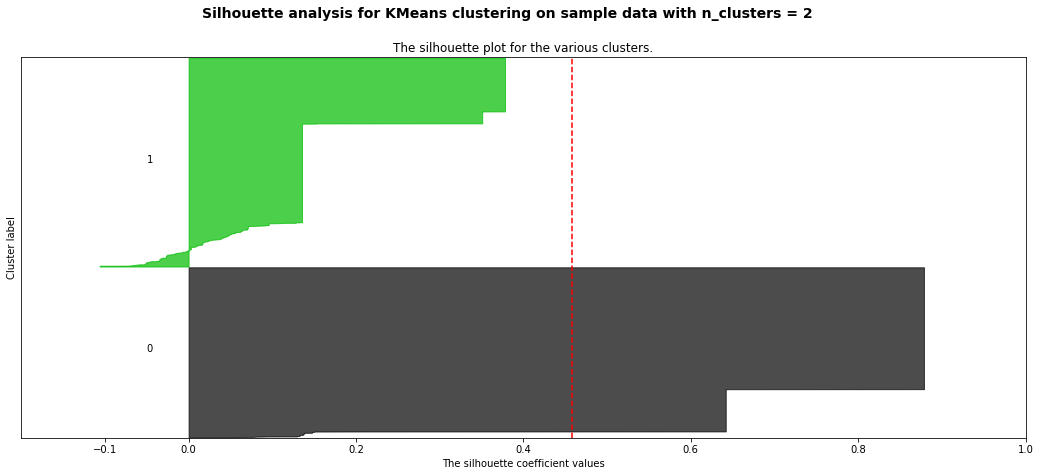

For n_clusters = 3 The average silhouette_score is : 0.5781982067855425


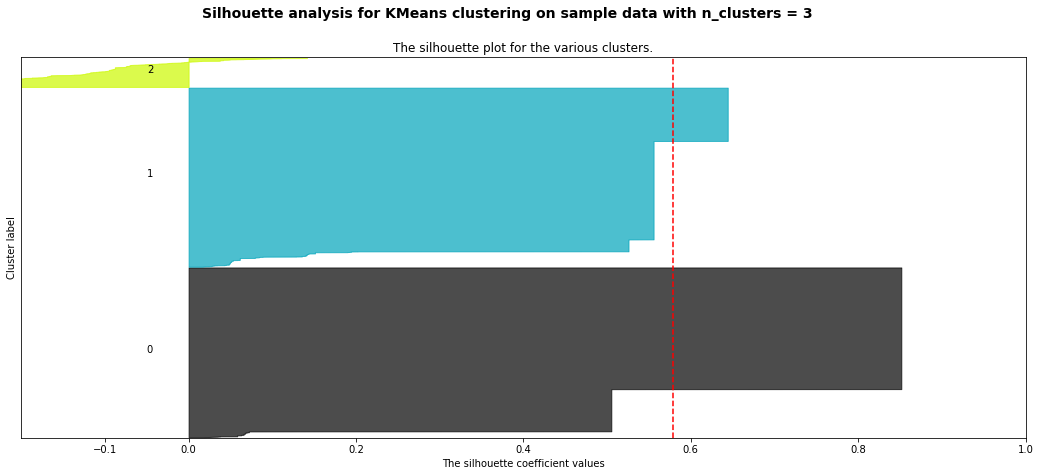

For n_clusters = 4 The average silhouette_score is : 0.5856546160083452


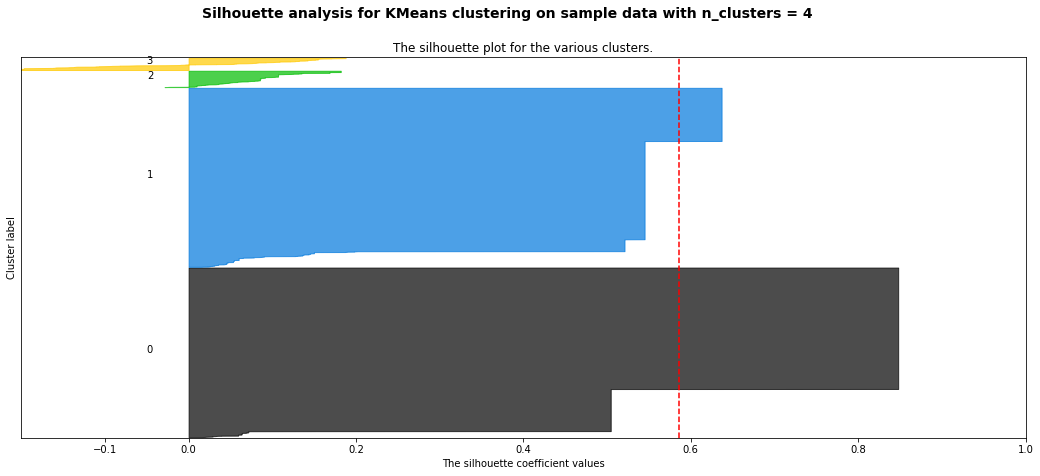

For n_clusters = 5 The average silhouette_score is : 0.6087852760419299


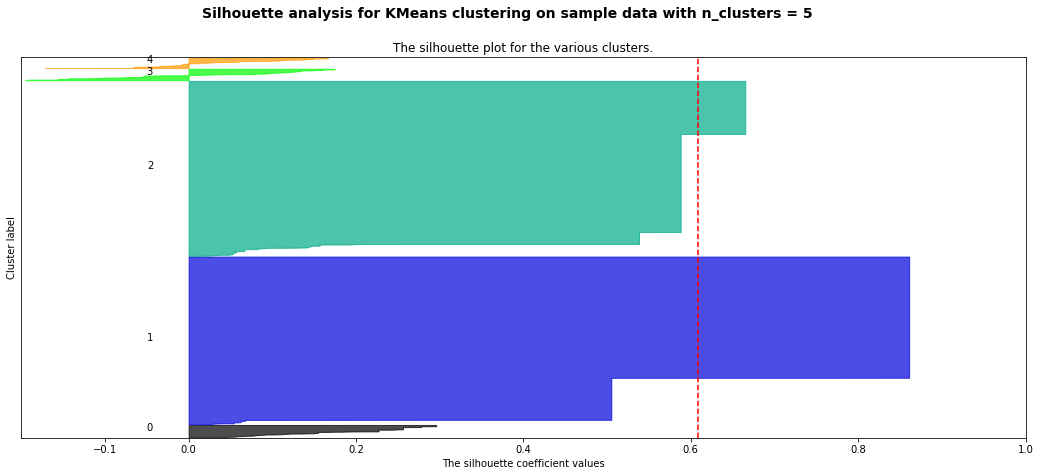

For n_clusters = 6 The average silhouette_score is : 0.6289656457829024


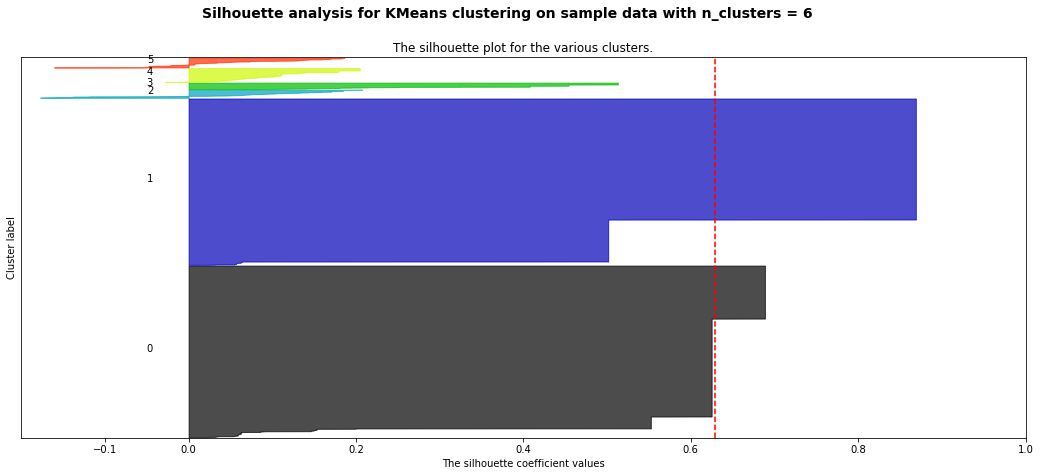

For n_clusters = 7 The average silhouette_score is : 0.6434514329429462


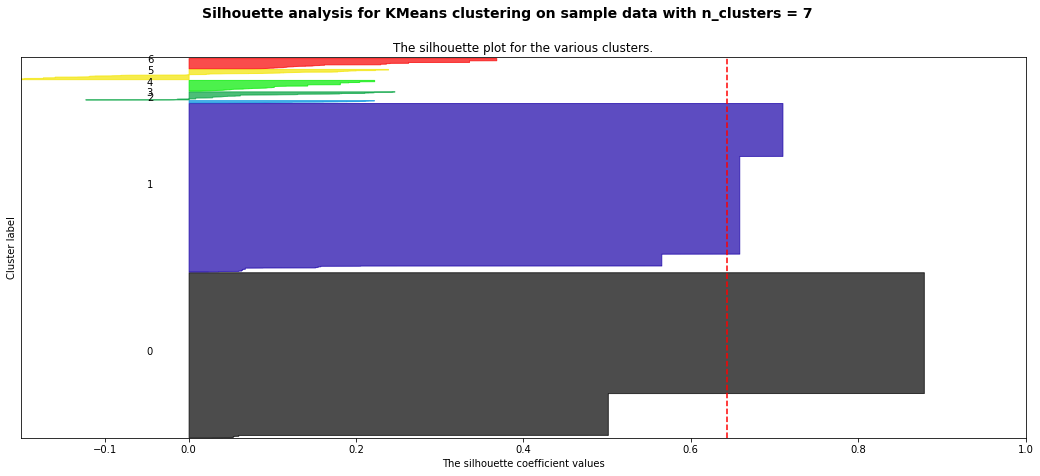

For n_clusters = 8 The average silhouette_score is : 0.654054295601385


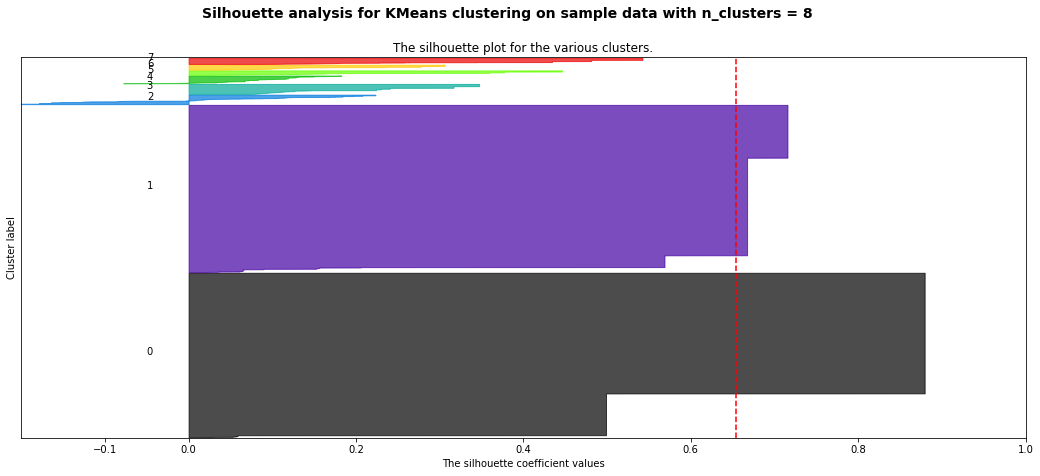

For n_clusters = 9 The average silhouette_score is : 0.6686674699667883


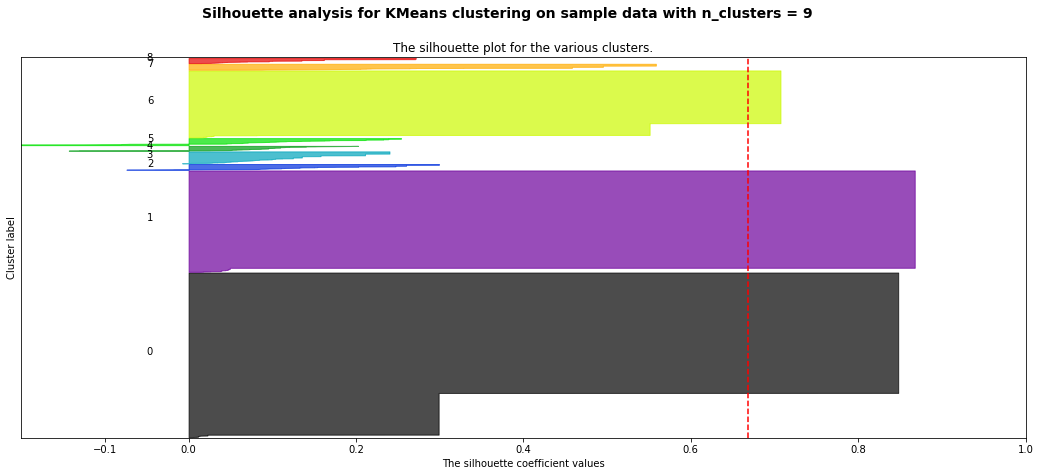

In [39]:
plot_silhouette(X)

## Self Care Practice Clustering

In [31]:
subset_sc = create_subset(public_df, selfCare_cols)

In [32]:
train_sc, test_sc = train_test_split(subset_sc, shuffle=True)

In [34]:
kmeans_sc = KMeans(n_clusters=6).fit(train_sc)
predictions_sc = kmeans_sc.predict(test_sc)
predictions_sc

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [35]:
np.unique(predictions_sc, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([1743,   19,   36,   16,   22,   21]))

## Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.051259560688099795


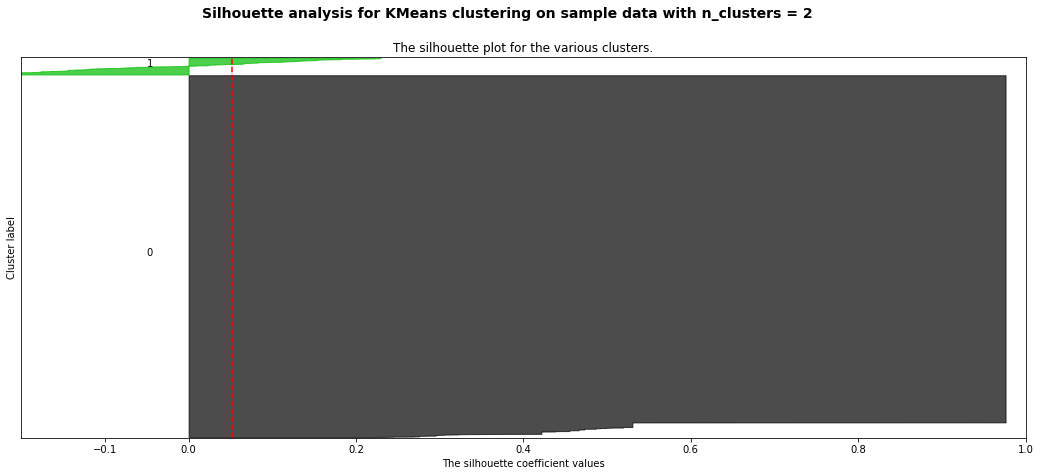

For n_clusters = 3 The average silhouette_score is : 0.049618887087125856


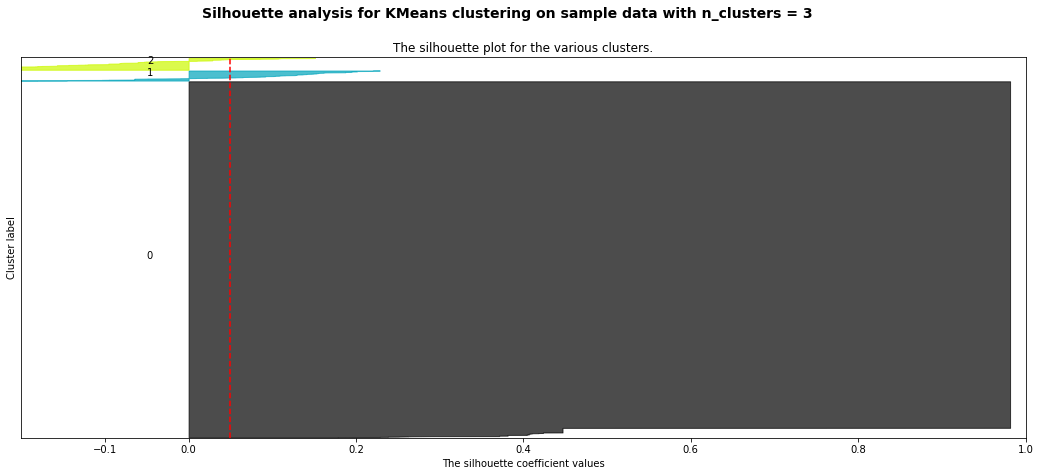

For n_clusters = 4 The average silhouette_score is : -0.17440608834357527


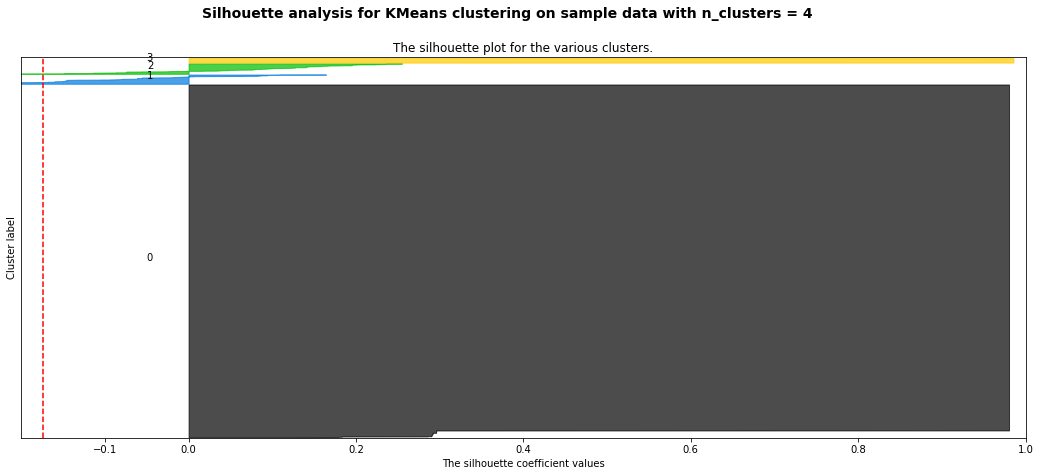

For n_clusters = 5 The average silhouette_score is : -0.17488060332208555


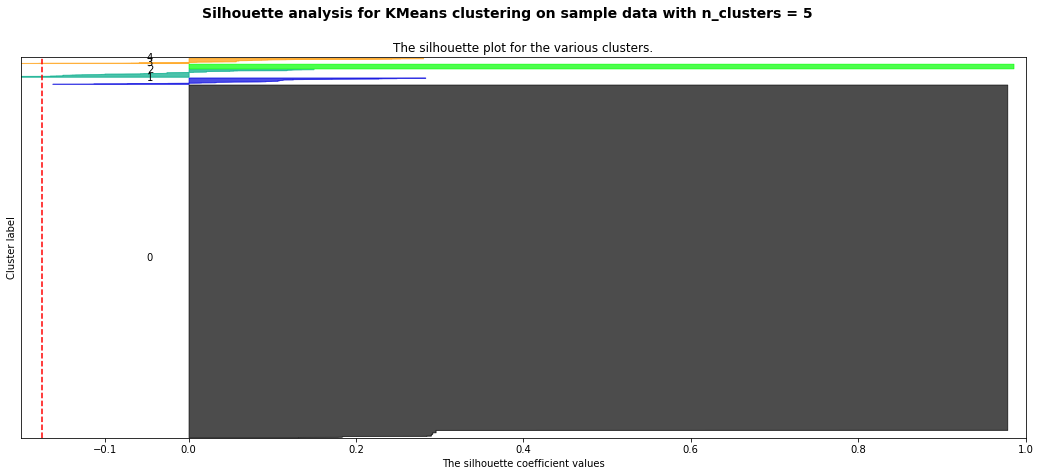

For n_clusters = 6 The average silhouette_score is : -0.17468492268800478


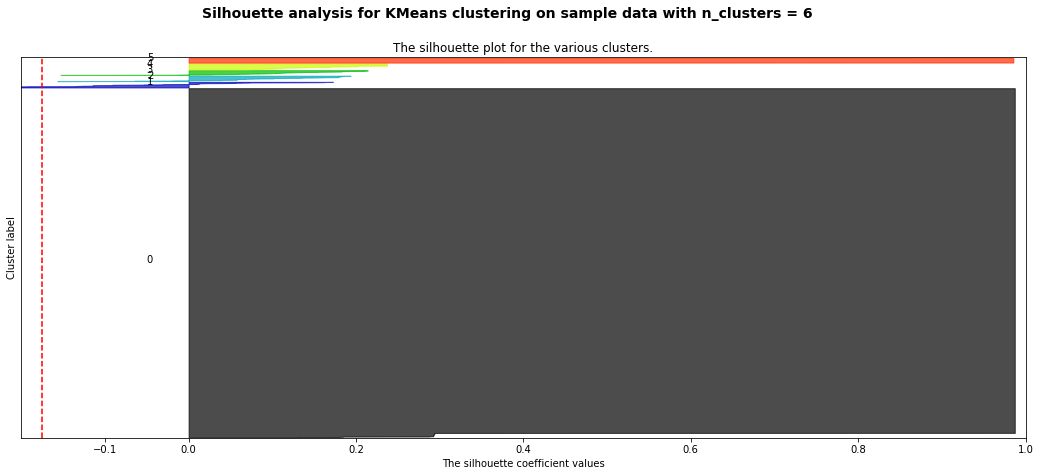

For n_clusters = 7 The average silhouette_score is : -0.17514038486471792


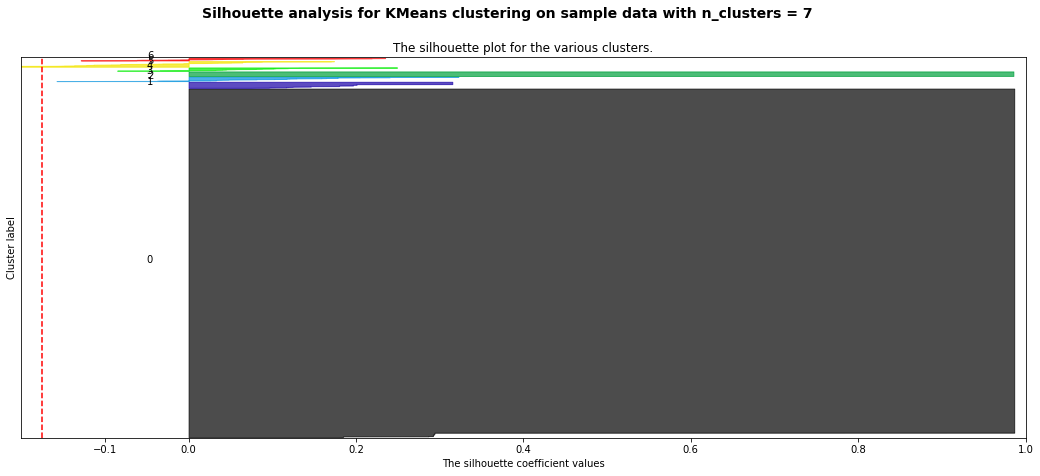

For n_clusters = 8 The average silhouette_score is : -0.17844426664403037


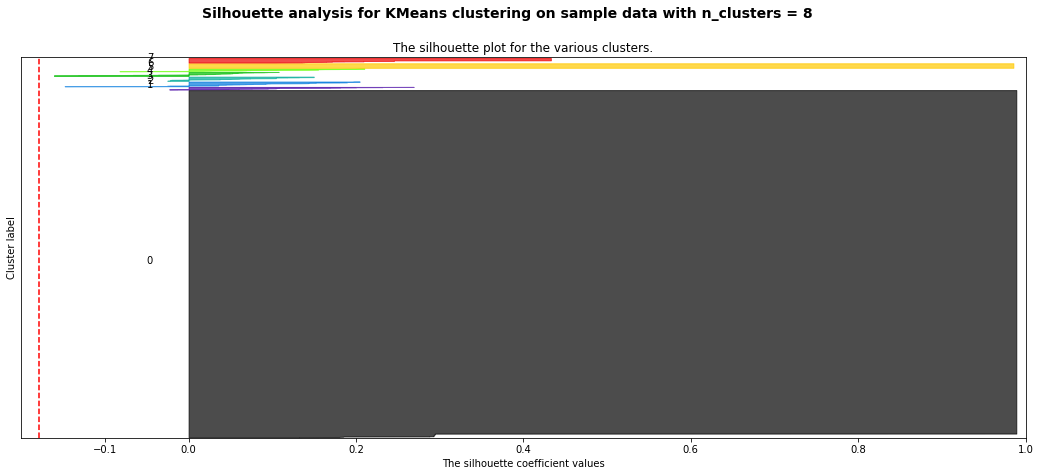

For n_clusters = 9 The average silhouette_score is : -0.17813369062861467


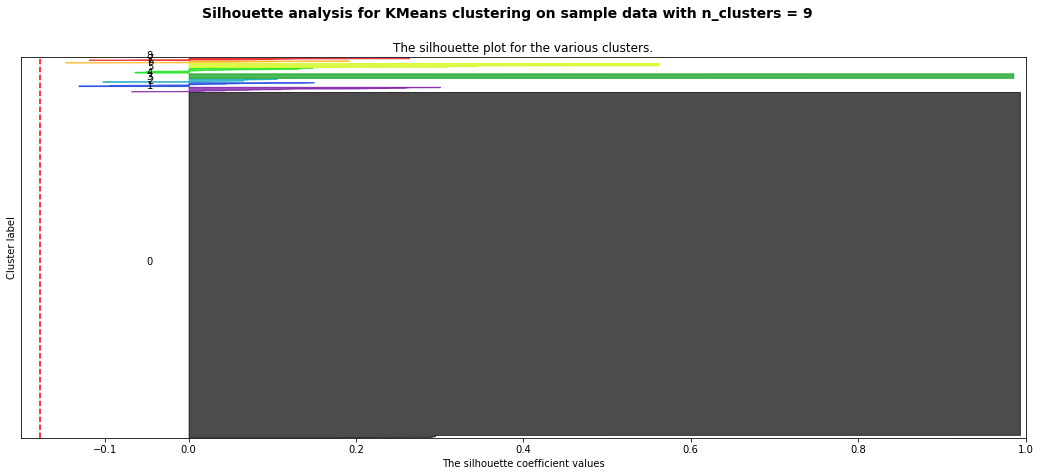

In [40]:
plot_silhouette(train_sc)